# Homework Challenge: A Triple SMA Crossover Stratetgy (Long-Short)

__Please proceed with the following steps:__

1. Understand the idea/rational behind a Triple SMA Crossover Strategy.

**롱 포지션 : 숏 > 미디엄 > 롱**

**중립 포지션: 미디엄 < 숏 < 롱**

**숏 포지션 : 숏 < 미디엄 < 롱**

2. Load the dataset bitcoin.csv, prepare the data and define/calculate SMA_S = 15 (short), SMA_M = 50 (medium) and SMA_L = 200 (long). 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
import numpy as np

In [5]:
df = pd.read_csv("bitcoin.csv", parse_dates=["Date"], index_col="Date")
df

,Open,High,Low,Close,Volume
Date,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...
2021-10-07 05:00:00,55073.20,55073.21,54545.07,54735.76,2251.122020
2021-10-07 06:00:00,54735.77,54968.06,54375.83,54534.16,1783.004260
2021-10-07 07:00:00,54534.16,54793.26,54235.33,54755.92,4163.431360


In [6]:
data = df[["Close"]].copy()
data

,Close
Date,
2017-08-17 04:00:00,4308.83
2017-08-17 05:00:00,4315.32
2017-08-17 06:00:00,4324.35
2017-08-17 07:00:00,4349.99
2017-08-17 08:00:00,4360.69
...,...
2021-10-07 05:00:00,54735.76
2021-10-07 06:00:00,54534.16
2021-10-07 07:00:00,54755.92


In [7]:
SMA_S = 15
SMA_M = 50
SMA_L = 200

In [8]:
data["SMA_S"] = data.Close.rolling(window = SMA_S).mean()
data["SMA_M"] = data.Close.rolling(window = SMA_M).mean()
data["SMA_L"] = data.Close.rolling(window = SMA_L).mean()
data

,Close,SMA_S,SMA_M,SMA_L
Date,,,,
2017-08-17 04:00:00,4308.83,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,NaN,NaN,NaN
2017-08-17 06:00:00,4324.35,NaN,NaN,NaN
2017-08-17 07:00:00,4349.99,NaN,NaN,NaN
2017-08-17 08:00:00,4360.69,NaN,NaN,NaN
...,...,...,...,...
2021-10-07 05:00:00,54735.76,54917.700667,52111.0732,47458.34450
2021-10-07 06:00:00,54534.16,54887.698667,52218.3902,47522.16155
2021-10-07 07:00:00,54755.92,54878.672000,52327.0086,47586.68185


In [9]:
data.dropna()
data

,Close,SMA_S,SMA_M,SMA_L
Date,,,,
2017-08-17 04:00:00,4308.83,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,NaN,NaN,NaN
2017-08-17 06:00:00,4324.35,NaN,NaN,NaN
2017-08-17 07:00:00,4349.99,NaN,NaN,NaN
2017-08-17 08:00:00,4360.69,NaN,NaN,NaN
...,...,...,...,...
2021-10-07 05:00:00,54735.76,54917.700667,52111.0732,47458.34450
2021-10-07 06:00:00,54534.16,54887.698667,52218.3902,47522.16155
2021-10-07 07:00:00,54755.92,54878.672000,52327.0086,47586.68185


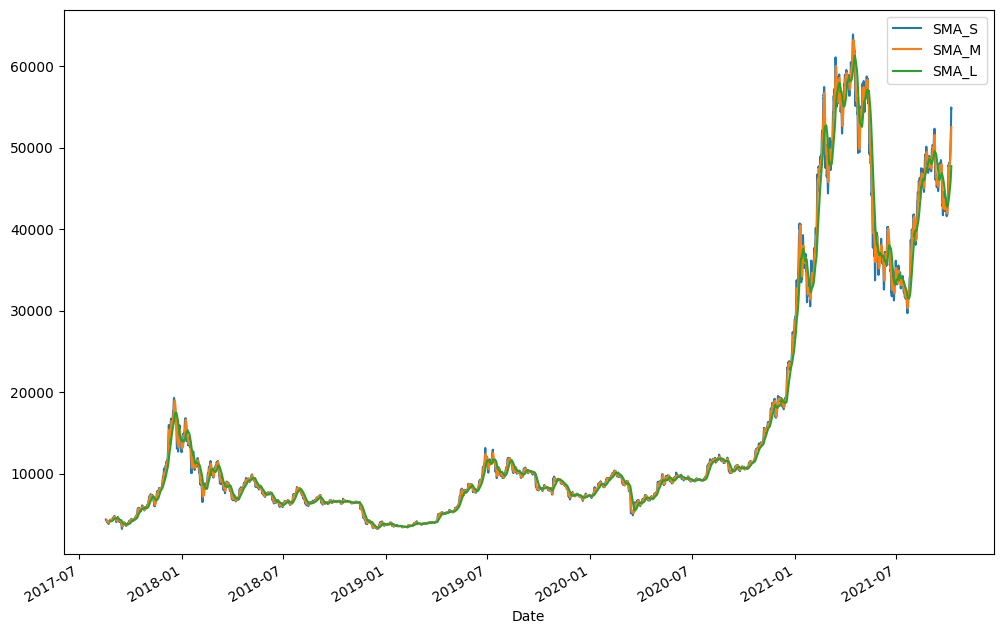

In [10]:
data[["SMA_S", "SMA_M", "SMA_L"]].plot(figsize=(12, 8))
plt.show()

3. Remember, to calculate simple moving average prices, you have to use df.price.rolling() (see Section 7, Lecture "Rolling Statistics").

4. Define the Trading Positions and visualize Trading Positions over time.

In [11]:
short_position = (data.SMA_S < data.SMA_M) & (data.SMA_M < data.SMA_L)
neutral_position = (data.SMA_M < data.SMA_S) & (data.SMA_S < data.SMA_L)
long_position = (data.SMA_L < data.SMA_M) & (data.SMA_M < data.SMA_S)

In [12]:
data["position"] = 0
data

,Close,SMA_S,SMA_M,SMA_L,position
Date,,,,,
2017-08-17 04:00:00,4308.83,NaN,NaN,NaN,0
2017-08-17 05:00:00,4315.32,NaN,NaN,NaN,0
2017-08-17 06:00:00,4324.35,NaN,NaN,NaN,0
2017-08-17 07:00:00,4349.99,NaN,NaN,NaN,0
2017-08-17 08:00:00,4360.69,NaN,NaN,NaN,0
...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,54917.700667,52111.0732,47458.34450,0
2021-10-07 06:00:00,54534.16,54887.698667,52218.3902,47522.16155,0
2021-10-07 07:00:00,54755.92,54878.672000,52327.0086,47586.68185,0


In [13]:
data.loc[short_position, "position"] = -1
data.loc[neutral_position, "position"] = 0
data.loc[long_position, "position"] = 1
data

,Close,SMA_S,SMA_M,SMA_L,position
Date,,,,,
2017-08-17 04:00:00,4308.83,NaN,NaN,NaN,0
2017-08-17 05:00:00,4315.32,NaN,NaN,NaN,0
2017-08-17 06:00:00,4324.35,NaN,NaN,NaN,0
2017-08-17 07:00:00,4349.99,NaN,NaN,NaN,0
2017-08-17 08:00:00,4360.69,NaN,NaN,NaN,0
...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,54917.700667,52111.0732,47458.34450,1
2021-10-07 06:00:00,54534.16,54887.698667,52218.3902,47522.16155,1
2021-10-07 07:00:00,54755.92,54878.672000,52327.0086,47586.68185,1


In [14]:
data.position.value_counts()

 0    14128
 1    12695
-1     9345
Name: position, dtype: int64

5. Adjust the Long_Short_Backtester Frawework to the Triple SMA Crossover (hint: there are three strategy parameters: SMA_S, SMA_M, SMA_L)

In [43]:
class Long_Short_Backtester():
    
    def __init__(self, filepath, symbol, start, end, tc):
        
        self.filepath = filepath
        self.symbol = symbol
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None
        self.get_data()
        self.tp_year = (self.data.Close.count() / ((self.data.index[-1] - self.data.index[0]).days / 365.25))
        
    def __repr__(self):
        return "Long_Short_Backtester(symbol = {}, start = {}, end = {})".format(self.symbol, self.start, self.end)
        
    def get_data(self):
        ''' Imports the data.
        '''
        raw = pd.read_csv(self.filepath, parse_dates = ["Date"], index_col = "Date")
        raw = raw.loc[self.start:self.end].copy()
        raw["returns"] = np.log(raw.Close / raw.Close.shift(1))
        self.data = raw
        
    def test_strategy(self, smas):
        '''
        Prepares the data and backtests the trading strategy incl. reporting (Wrapper).
         
        Parameters
        ============
        percentiles: tuple (return_low_perc, return_high_perc, vol_low_perc, vol_high_perc)
            return and volume percentiles to be considered for the strategy.
            
        thresh: tuple (return_low_thresh, return_high_thresh, vol_low_thresh, vol_high_thesh)
            return and volume thresholds to be considered for the strategy.
        '''
        
        self.SMA_S = smas[0]
        self.SMA_M = smas[1]
        self.SMA_L = smas[2]
        
        self.prepare_data(smas=smas)
        self.run_backtest()
        
        data = self.results.copy()
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        self.print_performance()
    
    def prepare_data(self, smas):
        ''' Prepares the Data for Backtesting.
        '''
        ########################## Strategy-Specific #############################
                
        data = self.data[["Close", "returns"]].copy()
        data["SMA_S"] = data.Close.rolling(window = smas[0]).mean()
        data["SMA_M"] = data.Close.rolling(window = smas[1]).mean()
        data["SMA_L"] = data.Close.rolling(window = smas[2]).mean()
        
        data.dropna(inplace=True)

        short_position = (data.SMA_S < data.SMA_M) & (data.SMA_M < data.SMA_L)
        # neutral_position = (data.SMA_M < data.SMA_S) & (data.SMA_S < data.SMA_L)
        long_position = (data.SMA_L < data.SMA_M) & (data.SMA_M < data.SMA_S)

        data["position"] = 0
        data.loc[short_position, "position"] = -1
        data.loc[long_position, "position"] = 1

        ##########################################################################
        
        self.results = data
    
    def run_backtest(self):
        ''' Runs the strategy backtest.
        '''
        
        data = self.results.copy()
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data["trades"] = data.position.diff().fillna(0).abs()
        data.strategy = data.strategy + data.trades * self.tc
        
        self.results = data
    
    def plot_results(self):
        '''  Plots the cumulative performance of the trading strategy compared to buy-and-hold.
        '''
        if self.results is None:
            print("Run test_strategy() first.")
        else:
            title = "{} | TC = {}".format(self.symbol, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
            
    def optimize_strategy(self, SMA_S_range, SMA_M_range, SMA_L_range, metric = "Multiple"):
        '''
        Backtests strategy for different parameter values incl. Optimization and Reporting (Wrapper).
         
        Parameters
        ============
        return_low_range: tuple
            tuples of the form (start, end, step size).
        
        return_high_range: tuple
            tuples of the form (start, end, step size).
            
        vol_low_range: tuple
            tuples of the form (start, end, step size).
        
        vol_high_range: tuple
            tuples of the form (start, end, step size).
        
        metric: str
            performance metric to be optimized (can be "Multiple" or "Sharpe")
        '''
        
        self.metric = metric
        
        if metric == "Multiple":
            performance_function = self.calculate_multiple
        elif metric == "Sharpe":
            performance_function = self.calculate_sharpe
        
        SMA_S_range = range(*SMA_S_range)
        SMA_M_range = range(*SMA_M_range)
        SMA_L_range = range(*SMA_L_range)
        
        combinations = list(product(SMA_S_range, SMA_M_range, SMA_L_range))
         
        performance = []
        for comb in combinations:
            self.prepare_data(smas=comb)
            self.run_backtest()
            performance.append(performance_function(self.results.strategy))
    
        self.results_overview =  pd.DataFrame(data = np.array(combinations), columns = ["SMA_S", "SMA_M", "SMA_L"])
        self.results_overview["performance"] = performance
        self.find_best_strategy()
        
        
    def find_best_strategy(self):
        ''' Finds the optimal strategy (global maximum).
        '''
        
        best = self.results_overview.nlargest(1, "performance")
        SMA_S = best.SMA_S.iloc[0]
        SMA_M = best.SMA_M.iloc[0]
        SMA_L = best.SMA_L.iloc[0]
        perf = best.performance.iloc[0]
        print("SMA_S: {} | SMA_M: {} | SMA_L : {} | {}: {}".format(SMA_S, SMA_M, SMA_L, self.metric, round(perf, 5)))  
        self.test_strategy(smas=(SMA_S, SMA_M, SMA_L))
            
    ############################## Performance ######################################
    
    def print_performance(self):
        ''' Calculates and prints various Performance Metrics.
        '''
        
        data = self.results.copy()
        strategy_multiple = round(self.calculate_multiple(data.strategy), 6)
        bh_multiple =       round(self.calculate_multiple(data.returns), 6)
        outperf =           round(strategy_multiple - bh_multiple, 6)
        cagr =              round(self.calculate_cagr(data.strategy), 6)
        ann_mean =          round(self.calculate_annualized_mean(data.strategy), 6)
        ann_std =           round(self.calculate_annualized_std(data.strategy), 6)
        sharpe =            round(self.calculate_sharpe(data.strategy), 6)
       
        print(100 * "=")
        print("TRIPLE SMA STRATEGY | INSTRUMENT = {} | SMAs = {}".format(self.symbol, [self.SMA_S, self.SMA_M, self.SMA_L]))
        print(100 * "-")
        print("PERFORMANCE MEASURES:")
        print("\n")
        print("Multiple (Strategy):         {}".format(strategy_multiple))
        print("Multiple (Buy-and-Hold):     {}".format(bh_multiple))
        print(38 * "-")
        print("Out-/Underperformance:       {}".format(outperf))
        print("\n")
        print("CAGR:                        {}".format(cagr))
        print("Annualized Mean:             {}".format(ann_mean))
        print("Annualized Std:              {}".format(ann_std))
        print("Sharpe Ratio:                {}".format(sharpe))
        
        print(100 * "=")
        
    def calculate_multiple(self, series):
        return np.exp(series.sum())
    
    def calculate_cagr(self, series):
        return np.exp(series.sum())**(1/((series.index[-1] - series.index[0]).days / 365.25)) - 1
    
    def calculate_annualized_mean(self, series):
        return series.mean() * self.tp_year
    
    def calculate_annualized_std(self, series):
        return series.std() * np.sqrt(self.tp_year)
    
    def calculate_sharpe(self, series):
        if series.std() == 0:
            return np.nan
        else:
            return self.calculate_cagr(series) / self.calculate_annualized_std(series)


6. Backtest the Triple SMA Strategy with the following inputs:

In [44]:
filepath = "bitcoin.csv"
symbol = "BTCUSDT"
start = "2017-08-17"
end = "2021-10-07"
tc = -0.00085
sma_s = 15
sma_m = 50
sma_l = 200

In [45]:
tester = Long_Short_Backtester(filepath, symbol, start, end, tc)
tester

Long_Short_Backtester(symbol = BTCUSDT, start = 2017-08-17, end = 2021-10-07)

In [46]:
tester.data

,Open,High,Low,Close,Volume,returns
Date,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,NaN
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,0.001505
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,0.002090
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,0.005912
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,0.002457
...,...,...,...,...,...,...
2021-10-07 05:00:00,55073.20,55073.21,54545.07,54735.76,2251.122020,-0.006146
2021-10-07 06:00:00,54735.77,54968.06,54375.83,54534.16,1783.004260,-0.003690
2021-10-07 07:00:00,54534.16,54793.26,54235.33,54755.92,4163.431360,0.004058


In [47]:
tester.test_strategy(smas=(sma_s, sma_m, sma_l))

TRIPLE SMA STRATEGY | INSTRUMENT = BTCUSDT | SMAs = [15, 50, 200]
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         14.96014
Multiple (Buy-and-Hold):     12.515385
--------------------------------------
Out-/Underperformance:       2.444755


CAGR:                        0.92986
Annualized Mean:             0.657168
Annualized Std:              0.733852
Sharpe Ratio:                1.267095


(The strategy multiple is:14.96014)

7. Repeat the Backtest with zero Trading Costs and compare.

(The strategy multiple with zero trading costs is: 37.528076)

8. Run the optimization (full period) in the following ranges:

In [48]:
SMA_S_range = (50, 300, 20) 
SMA_M_range = (500, 1500, 30)
SMA_L_range = (2000, 5000, 100)
metric = "Multiple"

In [49]:
tester.optimize_strategy(SMA_S_range=SMA_S_range,
                         SMA_M_range=SMA_M_range,
                         SMA_L_range=SMA_L_range,
                         metric=metric)

SMA_S: 170 | SMA_M: 1010 | SMA_L : 2400 | Multiple: 27.97009
TRIPLE SMA STRATEGY | INSTRUMENT = BTCUSDT | SMAs = [170, 1010, 2400]
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         27.970095
Multiple (Buy-and-Hold):     6.440464
--------------------------------------
Out-/Underperformance:       21.529631


CAGR:                        1.368589
Annualized Mean:             0.861886
Annualized Std:              0.710543
Sharpe Ratio:                1.926116


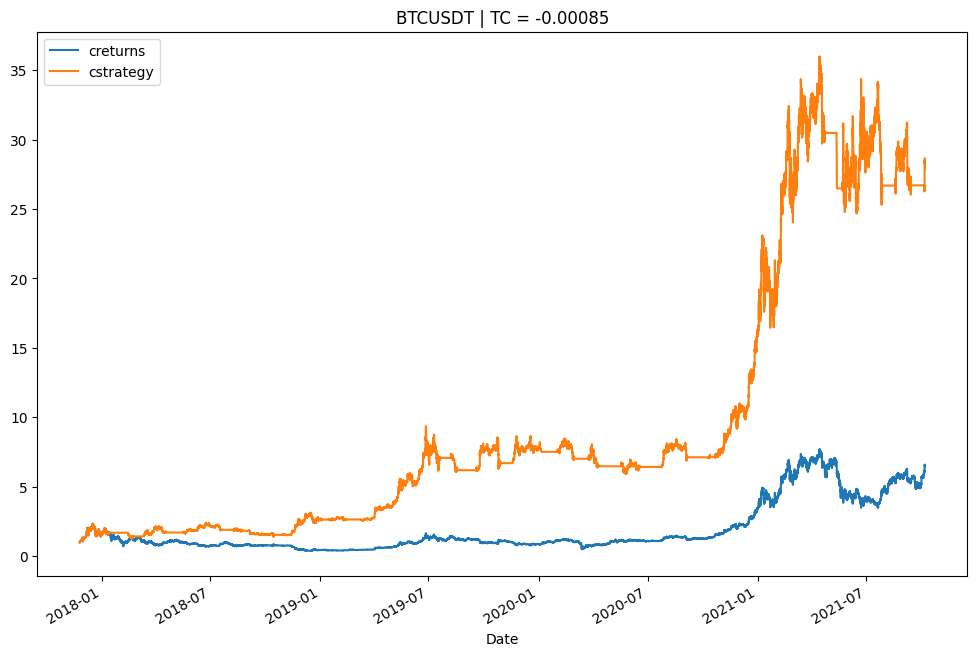

In [50]:
tester.plot_results()

In [51]:
tester.results

,Close,returns,SMA_S,SMA_M,SMA_L,position,strategy,trades,creturns,cstrategy
Date,,,,,,,,,,
2017-11-25 10:00:00,8401.81,0.002147,8080.808176,6666.490010,5264.025588,1,NaN,0.0,1.002149,NaN
2017-11-25 11:00:00,8419.54,0.002108,8084.805353,6669.256812,5265.738383,1,0.002108,0.0,1.004264,1.002110
2017-11-25 12:00:00,8499.00,0.009393,8089.442824,6672.010010,5267.481583,1,0.009393,0.0,1.013742,1.011568
2017-11-25 13:00:00,8535.00,0.004227,8094.072471,6674.797119,5269.236021,1,0.004227,0.0,1.018036,1.015853
2017-11-25 14:00:00,8488.80,-0.005428,8098.683059,6677.539129,5270.960525,1,-0.005428,0.0,1.012525,1.010354
...,...,...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,-0.006146,48431.924882,46776.153287,42205.733783,1,-0.006146,0.0,6.528761,28.353555
2021-10-07 06:00:00,54534.16,-0.003690,48496.792824,46781.934099,42213.913575,1,-0.003690,0.0,6.504714,28.249125
2021-10-07 07:00:00,54755.92,0.004058,48562.906941,46788.710465,42222.299796,1,0.004058,0.0,6.531165,28.363998


(The optimal backtesting solution is: SMA_S: 170 | SMA_M: 1010 | SMA_L : 2400 | Multiple: 27.97009)

9. Adjust the LongShortTrader Framework and implement/run the Triple SMA Strategy with the following parameters:

In [7]:
from binance.client import Client
from binance import ThreadedWebsocketManager
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import time

In [8]:
api_key = "Jc2gL6jUt0KRlsqfkKJ9kBHcP7m9IBB5M0ph7WV9AybJ6AupPEe3rxDgCWZmJcuH"
secret_key = pd.read_table("paper_secret_key.txt").columns[0]

In [9]:
client = Client(api_key=api_key, api_secret=secret_key, tld="com", testnet=True)

In [10]:
class LongShortTrader():
    
    def __init__(self, symbol, bar_length, sma_s, sma_m, sma_l, units, position = 0):
        
        self.symbol = symbol
        self.bar_length = bar_length
        self.available_intervals = ["1m", "3m", "5m", "15m", "30m", "1h", "2h", "4h", "6h", "8h", "12h", "1d", "3d", "1w", "1M"]
        self.units = units
        self.position = position
        self.trades = 0 
        self.trade_values = []
        
        #*****************add strategy-specific attributes here******************
        self.SMA_S = sma_s
        self.SMA_M = sma_m
        self.SMA_L = sma_l
        #************************************************************************
    
    def start_trading(self, historical_days):
        
        self.twm = ThreadedWebsocketManager()
        self.twm.start()
        
        if self.bar_length in self.available_intervals:
            self.get_most_recent(symbol = self.symbol, interval = self.bar_length,
                                 days = historical_days)
            self.twm.start_kline_socket(callback = self.stream_candles,
                                        symbol = self.symbol, interval = self.bar_length)
        # "else" to be added later in the course 
    
    def get_most_recent(self, symbol, interval, days):
    
        now = datetime.utcnow()
        past = str(now - timedelta(days = days))
    
        bars = client.get_historical_klines(symbol = symbol, interval = interval,
                                            start_str = past, end_str = None, limit = 1000)
        df = pd.DataFrame(bars)
        df["Date"] = pd.to_datetime(df.iloc[:,0], unit = "ms")
        df.columns = ["Open Time", "Open", "High", "Low", "Close", "Volume",
                      "Clos Time", "Quote Asset Volume", "Number of Trades",
                      "Taker Buy Base Asset Volume", "Taker Buy Quote Asset Volume", "Ignore", "Date"]
        df = df[["Date", "Open", "High", "Low", "Close", "Volume"]].copy()
        df.set_index("Date", inplace = True)
        for column in df.columns:
            df[column] = pd.to_numeric(df[column], errors = "coerce")
        df["Complete"] = [True for row in range(len(df)-1)] + [False]
        
        self.data = df
    
    def stream_candles(self, msg):
        
        # extract the required items from msg
        event_time = pd.to_datetime(msg["E"], unit = "ms")
        start_time = pd.to_datetime(msg["k"]["t"], unit = "ms")
        first   = float(msg["k"]["o"])
        high    = float(msg["k"]["h"])
        low     = float(msg["k"]["l"])
        close   = float(msg["k"]["c"])
        volume  = float(msg["k"]["v"])
        complete=       msg["k"]["x"]
    
        # stop trading session
        if self.trades >= 5: # stop stream after 5 trades
            self.twm.stop()
            if self.position == 1:
                order = client.create_order(symbol = self.symbol, side = "SELL", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING NEUTRAL AND STOP")
                self.position = 0
            elif self.position == -1:
                order = client.create_order(symbol = self.symbol, side = "BUY", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING NEUTRAL AND STOP")
                self.position = 0
            else: 
                print("STOP")
        
        # print out
        print(".", end = "", flush = True) # just print something to get a feedback (everything OK) 
    
        # feed df (add new bar / update latest bar)
        self.data.loc[start_time] = [first, high, low, close, volume, complete]
        
        # prepare features and define strategy/trading positions whenever the latest bar is complete
        if complete == True:
            self.define_strategy()
            self.execute_trades()
        
    def define_strategy(self):
        
        data = self.data.copy()
        
        #******************** define your strategy here ************************
        data = data[["Close"]].copy()
        
        data["SMA_S"] = data.Close.rolling(window = self.SMA_S).mean()
        data["SMA_M"] = data.Close.rolling(window = self.SMA_M).mean()
        data["SMA_L"] = data.Close.rolling(window = self.SMA_L).mean()
        
        data.dropna(inplace = True)
                
        cond1 = (data.SMA_S > data.SMA_M) & (data.SMA_M > data.SMA_L)
        cond2 = (data.SMA_S < data.SMA_M) & (data.SMA_M < data.SMA_L)
        
        data["position"] = 0
        data.loc[cond1, "position"] = 1
        data.loc[cond2, "position"] = -1
        #***********************************************************************
        
        self.prepared_data = data.copy()
    
    def execute_trades(self): 
        if self.prepared_data["position"].iloc[-1] == 1: # if position is long -> go/stay long
            if self.position == 0:
                order = client.create_order(symbol = self.symbol, side = "BUY", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING LONG")  
            elif self.position == -1:
                order = client.create_order(symbol = self.symbol, side = "BUY", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING NEUTRAL")
                time.sleep(1)
                order = client.create_order(symbol = self.symbol, side = "BUY", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING LONG")
            self.position = 1
        elif self.prepared_data["position"].iloc[-1] == 0: # if position is neutral -> go/stay neutral
            if self.position == 1:
                order = client.create_order(symbol = self.symbol, side = "SELL", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING NEUTRAL") 
            elif self.position == -1:
                order = client.create_order(symbol = self.symbol, side = "BUY", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING NEUTRAL") 
            self.position = 0
        if self.prepared_data["position"].iloc[-1] == -1: # if position is short -> go/stay short
            if self.position == 0:
                order = client.create_order(symbol = self.symbol, side = "SELL", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING SHORT") 
            elif self.position == 1:
                order = client.create_order(symbol = self.symbol, side = "SELL", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING NEUTRAL")
                time.sleep(1)
                order = client.create_order(symbol = self.symbol, side = "SELL", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING SHORT")
            self.position = -1
    
    def report_trade(self, order, going): 
        
        # extract data from order object
        side = order["side"]
        time = pd.to_datetime(order["transactTime"], unit = "ms")
        base_units = float(order["executedQty"])
        quote_units = float(order["cummulativeQuoteQty"])
        price = round(quote_units / base_units, 5)
        
        # calculate trading profits
        self.trades += 1
        if side == "BUY":
            self.trade_values.append(-quote_units)
        elif side == "SELL":
            self.trade_values.append(quote_units) 
        
        if self.trades % 2 == 0:
            real_profit = round(np.sum(self.trade_values[-2:]), 3) 
            self.cum_profits = round(np.sum(self.trade_values), 3)
        else: 
            real_profit = 0
            self.cum_profits = round(np.sum(self.trade_values[:-1]), 3)
        
        # print trade report
        print(2 * "\n" + 100* "-")
        print("{} | {}".format(time, going)) 
        print("{} | Base_Units = {} | Quote_Units = {} | Price = {} ".format(time, base_units, quote_units, price))
        print("{} | Profit = {} | CumProfits = {} ".format(time, real_profit, self.cum_profits))
        print(100 * "-" + "\n")

In [11]:
symbol = "BTCUSDT"
bar_length = "1m"
sma_s = 10
sma_m = 20
sma_l = 50
units = 0.001
position = 0

In [15]:
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'updateTime': 1685608920135,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB',
   'free': '1000.00000000',
   'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.00300000', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '100.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '9954.70199003', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}],
 'permissions': ['SPOT']}

.......................................................................................................................................................

In [13]:
trader = LongShortTrader(symbol, bar_length, sma_s, sma_m, sma_l, units, position)

In [14]:
trader.start_trading(historical_days=1/24)

........

----------------------------------------------------------------------------------------------------
2023-06-01 08:42:00.135000 | GOING LONG
2023-06-01 08:42:00.135000 | Base_Units = 0.001 | Quote_Units = 26.8581 | Price = 26858.1 
2023-06-01 08:42:00.135000 | Profit = 0 | CumProfits = 0.0 
----------------------------------------------------------------------------------------------------

.......................................................................

10. Implement/run the Triple SMA Strategy with the following parameters:

In [ ]:
symbol = "BTCUSDT"
bar_length = "1h"
sma_s = 15
sma_m = 50
sma_l = 200
units = 0.001
position = 0

Be careful here! (hint: check the historical data requirements!)

# ++++ Solution - Stop here if you want to do the exercise on your own! ++++

## Getting the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
data = pd.read_csv("bitcoin.csv", parse_dates = ["Date"], index_col = "Date")
data

In [ ]:
data.info()

In [ ]:
data = data[["Close"]].copy()

In [ ]:
data

In [ ]:
data["returns"] = np.log(data.Close.div(data.Close.shift(1)))

In [ ]:
data

In [ ]:
data.info()

## Formulating a Triple SMA Crossover Strategy

In [ ]:
SMA_S = 15
SMA_M = 50
SMA_L = 200

In [ ]:
data["SMA_S"] = data.Close.rolling(window = SMA_S).mean()
data["SMA_M"] = data.Close.rolling(window = SMA_M).mean()
data["SMA_L"] = data.Close.rolling(window = SMA_L).mean()

In [ ]:
data

In [ ]:
data.dropna(inplace = True)

In [ ]:
smas = ["SMA_S", "SMA_M", "SMA_L"]
smas

In [ ]:
data[smas].plot(figsize = (12, 8))
plt.show()

In [ ]:
data["position"] = 0 # Trading position -> Neutral for all bars
data

In [ ]:
cond1 = (data.SMA_S > data.SMA_M) & (data.SMA_M > data.SMA_L)
cond1

In [ ]:
cond2 = (data.SMA_S < data.SMA_M) & (data.SMA_M < data.SMA_L)
cond2

In [ ]:
data.loc[cond1, "position"] = 1
data.loc[cond2, "position"] = -1

In [ ]:
data.position.value_counts()

In [ ]:
data[smas + ["position"]].plot(figsize = (12, 8), secondary_y = "position")
plt.show()

## Backtesting

In [31]:
class Long_Short_Backtester():
    ''' Class for the vectorized backtesting of simple Long-Short trading strategies.
    
    Attributes
    ============
    filepath: str
        local filepath of the dataset (csv-file)
    symbol: str
        ticker symbol (instrument) to be backtested
    start: str
        start date for data import
    end: str
        end date for data import
    tc: float
        proportional trading costs per trade
    
    
    Methods
    =======
    get_data:
        imports the data.
        
    test_strategy:
        prepares the data and backtests the trading strategy incl. reporting (wrapper).
        
    prepare_data:
        prepares the data for backtesting.
    
    run_backtest:
        runs the strategy backtest.
        
    plot_results:
        plots the cumulative performance of the trading strategy compared to buy-and-hold.
        
    optimize_strategy:
        backtests strategy for different parameter values incl. optimization and reporting (wrapper).
    
    find_best_strategy:
        finds the optimal strategy (global maximum).
         
        
    print_performance:
        calculates and prints various performance metrics.
        
    '''    
    
    def __init__(self, filepath, symbol, start, end, tc):
        
        self.filepath = filepath
        self.symbol = symbol
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None
        self.get_data()
        self.tp_year = (self.data.Close.count() / ((self.data.index[-1] - self.data.index[0]).days / 365.25))
        
    def __repr__(self):
        return "Long_Short_Backtester(symbol = {}, start = {}, end = {})".format(self.symbol, self.start, self.end)
        
    def get_data(self):
        ''' Imports the data.
        '''
        raw = pd.read_csv(self.filepath, parse_dates = ["Date"], index_col = "Date")
        raw = raw.loc[self.start:self.end].copy()
        raw["returns"] = np.log(raw.Close / raw.Close.shift(1))
        self.data = raw
        
    def test_strategy(self, smas):
        '''
        Prepares the data and backtests the trading strategy incl. reporting (Wrapper).
         
        Parameters
        ============
        smas: tuple (SMA_S, SMA_M, SMA_L)
            Simple Moving Averages to be considered for the strategy.
            
        '''
        
        self.SMA_S = smas[0]
        self.SMA_M = smas[1]
        self.SMA_L = smas[2]
        
        
        self.prepare_data(smas = smas)
        self.run_backtest()
        
        data = self.results.copy()
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        self.print_performance()
    
    def prepare_data(self, smas):
        ''' Prepares the Data for Backtesting.
        '''
        ########################## Strategy-Specific #############################
        
        data = self.data[["Close", "returns"]].copy()
        data["SMA_S"] = data.Close.rolling(window = smas[0]).mean()
        data["SMA_M"] = data.Close.rolling(window = smas[1]).mean()
        data["SMA_L"] = data.Close.rolling(window = smas[2]).mean()
        
        data.dropna(inplace = True)
                
        cond1 = (data.SMA_S > data.SMA_M) & (data.SMA_M > data.SMA_L)
        cond2 = (data.SMA_S < data.SMA_M) & (data.SMA_M < data.SMA_L)
        
        data["position"] = 0
        data.loc[cond1, "position"] = 1
        data.loc[cond2, "position"] = -1

        ##########################################################################
        
        self.results = data
    
    def run_backtest(self):
        ''' Runs the strategy backtest.
        '''
        
        data = self.results.copy()
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data["trades"] = data.position.diff().fillna(0).abs()
        data.strategy = data.strategy + data.trades * self.tc
        
        self.results = data
    
    def plot_results(self):
        '''  Plots the cumulative performance of the trading strategy compared to buy-and-hold.
        '''
        if self.results is None:
            print("Run test_strategy() first.")
        else:
            title = "{} | TC = {}".format(self.symbol, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
            
    def optimize_strategy(self, SMA_S_range, SMA_M_range, SMA_L_range, metric = "Multiple"):
        '''
        Backtests strategy for different parameter values incl. Optimization and Reporting (Wrapper).
         
        Parameters
        ============
        SMA_S_range: tuple
            tuples of the form (start, end, step size).
        
        SMA_M_range: tuple
            tuples of the form (start, end, step size).
            
        SMA_L_range: tuple
            tuples of the form (start, end, step size).
        
        metric: str
            performance metric to be optimized (can be "Multiple" or "Sharpe")
        '''
        
        self.metric = metric
        
        if metric == "Multiple":
            performance_function = self.calculate_multiple
        elif metric == "Sharpe":
            performance_function = self.calculate_sharpe
        
        SMA_S_range = range(*SMA_S_range)
        SMA_M_range = range(*SMA_M_range)
        SMA_L_range = range(*SMA_L_range)
        
        combinations = list(product(SMA_S_range, SMA_M_range, SMA_L_range))
         
        performance = []
        for comb in combinations:
            self.prepare_data(smas = comb)
            self.run_backtest()
            performance.append(performance_function(self.results.strategy))
    
        self.results_overview =  pd.DataFrame(data = np.array(combinations), columns = ["SMA_S", "SMA_M", "SMA_L"])
        self.results_overview["performance"] = performance
        self.find_best_strategy()
        
        
    def find_best_strategy(self):
        ''' Finds the optimal strategy (global maximum).
        '''
        
        best = self.results_overview.nlargest(1, "performance")
        SMA_S = best.SMA_S.iloc[0]
        SMA_M = best.SMA_M.iloc[0]
        SMA_L = best.SMA_L.iloc[0]
        perf = best.performance.iloc[0]
        print("SMA_S: {} | SMA_M: {} | SMA_L : {} | {}: {}".format(SMA_S, SMA_M, SMA_L, self.metric, round(perf, 5)))  
        self.test_strategy(smas = (SMA_S, SMA_M, SMA_L))
            
    ############################## Performance ######################################
    
    def print_performance(self):
        ''' Calculates and prints various Performance Metrics.
        '''
        
        data = self.results.copy()
        strategy_multiple = round(self.calculate_multiple(data.strategy), 6)
        bh_multiple =       round(self.calculate_multiple(data.returns), 6)
        outperf =           round(strategy_multiple - bh_multiple, 6)
        cagr =              round(self.calculate_cagr(data.strategy), 6)
        ann_mean =          round(self.calculate_annualized_mean(data.strategy), 6)
        ann_std =           round(self.calculate_annualized_std(data.strategy), 6)
        sharpe =            round(self.calculate_sharpe(data.strategy), 6)
       
        print(100 * "=")
        print("TRIPLE SMA STRATEGY | INSTRUMENT = {} | SMAs = {}".format(self.symbol, [self.SMA_S, self.SMA_M, self.SMA_L]))
        print(100 * "-")
        print("PERFORMANCE MEASURES:")
        print("\n")
        print("Multiple (Strategy):         {}".format(strategy_multiple))
        print("Multiple (Buy-and-Hold):     {}".format(bh_multiple))
        print(38 * "-")
        print("Out-/Underperformance:       {}".format(outperf))
        print("\n")
        print("CAGR:                        {}".format(cagr))
        print("Annualized Mean:             {}".format(ann_mean))
        print("Annualized Std:              {}".format(ann_std))
        print("Sharpe Ratio:                {}".format(sharpe))
        
        print(100 * "=")
        
    def calculate_multiple(self, series):
        return np.exp(series.sum())
    
    def calculate_cagr(self, series):
        return np.exp(series.sum())**(1/((series.index[-1] - series.index[0]).days / 365.25)) - 1
    
    def calculate_annualized_mean(self, series):
        return series.mean() * self.tp_year
    
    def calculate_annualized_std(self, series):
        return series.std() * np.sqrt(self.tp_year)
    
    def calculate_sharpe(self, series):
        if series.std() == 0:
            return np.nan
        else:
            return self.calculate_cagr(series) / self.calculate_annualized_std(series)

In [32]:
filepath = "bitcoin.csv"
symbol = "BTCUSDT"
start = "2017-08-17"
end = "2021-10-07"
tc = -0.00085
sma_s = 15 
sma_m = 50 
sma_l = 200 

In [33]:
tester = Long_Short_Backtester(filepath = filepath, symbol = symbol,
                              start = start, end = end, tc = tc)

In [34]:
tester.data

,Open,High,Low,Close,Volume,returns
Date,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,NaN
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,0.001505
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,0.002090
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,0.005912
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,0.002457
...,...,...,...,...,...,...
2021-10-07 05:00:00,55073.20,55073.21,54545.07,54735.76,2251.122020,-0.006146
2021-10-07 06:00:00,54735.77,54968.06,54375.83,54534.16,1783.004260,-0.003690
2021-10-07 07:00:00,54534.16,54793.26,54235.33,54755.92,4163.431360,0.004058


In [35]:
tester.test_strategy(smas = (sma_s, sma_m, sma_l))

TRIPLE SMA STRATEGY | INSTRUMENT = BTCUSDT | SMAs = [15, 50, 200]
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         14.96014
Multiple (Buy-and-Hold):     12.515385
--------------------------------------
Out-/Underperformance:       2.444755


CAGR:                        0.92986
Annualized Mean:             0.657168
Annualized Std:              0.733852
Sharpe Ratio:                1.267095


In [ ]:
tester.plot_results()

In [ ]:
tester.results

In [ ]:
tester.results.trades.value_counts()

## Optimization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn")

In [ ]:
tester.optimize_strategy(SMA_S_range = (50, 300, 20), 
                         SMA_M_range = (500, 1500, 30),
                         SMA_L_range = (2000, 5000, 100),
                         metric = "Multiple")

In [ ]:
tester.plot_results()

In [ ]:
tester.results

## Implementation

In [ ]:
from binance.client import Client
from binance import ThreadedWebsocketManager
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time

In [ ]:
api_key = "insert here"
secret_key = "insert here"

In [ ]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True)

In [ ]:
class LongShortTrader():
    
    def __init__(self, symbol, bar_length, sma_s, sma_m, sma_l, units, position = 0):
        
        self.symbol = symbol
        self.bar_length = bar_length
        self.available_intervals = ["1m", "3m", "5m", "15m", "30m", "1h", "2h", "4h", "6h", "8h", "12h", "1d", "3d", "1w", "1M"]
        self.units = units
        self.position = position
        self.trades = 0 
        self.trade_values = []
        
        #*****************add strategy-specific attributes here******************
        self.SMA_S = sma_s
        self.SMA_M = sma_m
        self.SMA_L = sma_l
        #************************************************************************
    
    def start_trading(self, historical_days):
        
        self.twm = ThreadedWebsocketManager()
        self.twm.start()
        
        if self.bar_length in self.available_intervals:
            self.get_most_recent(symbol = self.symbol, interval = self.bar_length,
                                 days = historical_days)
            self.twm.start_kline_socket(callback = self.stream_candles,
                                        symbol = self.symbol, interval = self.bar_length)
        # "else" to be added later in the course 
    
    def get_most_recent(self, symbol, interval, days):
    
        now = datetime.utcnow()
        past = str(now - timedelta(days = days))
    
        bars = client.get_historical_klines(symbol = symbol, interval = interval,
                                            start_str = past, end_str = None, limit = 1000)
        df = pd.DataFrame(bars)
        df["Date"] = pd.to_datetime(df.iloc[:,0], unit = "ms")
        df.columns = ["Open Time", "Open", "High", "Low", "Close", "Volume",
                      "Clos Time", "Quote Asset Volume", "Number of Trades",
                      "Taker Buy Base Asset Volume", "Taker Buy Quote Asset Volume", "Ignore", "Date"]
        df = df[["Date", "Open", "High", "Low", "Close", "Volume"]].copy()
        df.set_index("Date", inplace = True)
        for column in df.columns:
            df[column] = pd.to_numeric(df[column], errors = "coerce")
        df["Complete"] = [True for row in range(len(df)-1)] + [False]
        
        self.data = df
    
    def stream_candles(self, msg):
        
        # extract the required items from msg
        event_time = pd.to_datetime(msg["E"], unit = "ms")
        start_time = pd.to_datetime(msg["k"]["t"], unit = "ms")
        first   = float(msg["k"]["o"])
        high    = float(msg["k"]["h"])
        low     = float(msg["k"]["l"])
        close   = float(msg["k"]["c"])
        volume  = float(msg["k"]["v"])
        complete=       msg["k"]["x"]
    
        # stop trading session
        if self.trades >= 5: # stop stream after 5 trades
            self.twm.stop()
            if self.position == 1:
                order = client.create_order(symbol = self.symbol, side = "SELL", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING NEUTRAL AND STOP")
                self.position = 0
            elif self.position == -1:
                order = client.create_order(symbol = self.symbol, side = "BUY", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING NEUTRAL AND STOP")
                self.position = 0
            else: 
                print("STOP")
        
        # print out
        print(".", end = "", flush = True) # just print something to get a feedback (everything OK) 
    
        # feed df (add new bar / update latest bar)
        self.data.loc[start_time] = [first, high, low, close, volume, complete]
        
        # prepare features and define strategy/trading positions whenever the latest bar is complete
        if complete == True:
            self.define_strategy()
            self.execute_trades()
        
    def define_strategy(self):
        
        data = self.data.copy()
        
        #******************** define your strategy here ************************
        data = data[["Close"]].copy()
        
        data["SMA_S"] = data.Close.rolling(window = self.SMA_S).mean()
        data["SMA_M"] = data.Close.rolling(window = self.SMA_M).mean()
        data["SMA_L"] = data.Close.rolling(window = self.SMA_L).mean()
        
        data.dropna(inplace = True)
                
        cond1 = (data.SMA_S > data.SMA_M) & (data.SMA_M > data.SMA_L)
        cond2 = (data.SMA_S < data.SMA_M) & (data.SMA_M < data.SMA_L)
        
        data["position"] = 0
        data.loc[cond1, "position"] = 1
        data.loc[cond2, "position"] = -1
        #***********************************************************************
        
        self.prepared_data = data.copy()
    
    def execute_trades(self): 
        if self.prepared_data["position"].iloc[-1] == 1: # if position is long -> go/stay long
            if self.position == 0:
                order = client.create_order(symbol = self.symbol, side = "BUY", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING LONG")  
            elif self.position == -1:
                order = client.create_order(symbol = self.symbol, side = "BUY", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING NEUTRAL")
                time.sleep(1)
                order = client.create_order(symbol = self.symbol, side = "BUY", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING LONG")
            self.position = 1
        elif self.prepared_data["position"].iloc[-1] == 0: # if position is neutral -> go/stay neutral
            if self.position == 1:
                order = client.create_order(symbol = self.symbol, side = "SELL", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING NEUTRAL") 
            elif self.position == -1:
                order = client.create_order(symbol = self.symbol, side = "BUY", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING NEUTRAL") 
            self.position = 0
        if self.prepared_data["position"].iloc[-1] == -1: # if position is short -> go/stay short
            if self.position == 0:
                order = client.create_order(symbol = self.symbol, side = "SELL", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING SHORT") 
            elif self.position == 1:
                order = client.create_order(symbol = self.symbol, side = "SELL", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING NEUTRAL")
                time.sleep(1)
                order = client.create_order(symbol = self.symbol, side = "SELL", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING SHORT")
            self.position = -1
    
    def report_trade(self, order, going): 
        
        # extract data from order object
        side = order["side"]
        time = pd.to_datetime(order["transactTime"], unit = "ms")
        base_units = float(order["executedQty"])
        quote_units = float(order["cummulativeQuoteQty"])
        price = round(quote_units / base_units, 5)
        
        # calculate trading profits
        self.trades += 1
        if side == "BUY":
            self.trade_values.append(-quote_units)
        elif side == "SELL":
            self.trade_values.append(quote_units) 
        
        if self.trades % 2 == 0:
            real_profit = round(np.sum(self.trade_values[-2:]), 3) 
            self.cum_profits = round(np.sum(self.trade_values), 3)
        else: 
            real_profit = 0
            self.cum_profits = round(np.sum(self.trade_values[:-1]), 3)
        
        # print trade report
        print(2 * "\n" + 100* "-")
        print("{} | {}".format(time, going)) 
        print("{} | Base_Units = {} | Quote_Units = {} | Price = {} ".format(time, base_units, quote_units, price))
        print("{} | Profit = {} | CumProfits = {} ".format(time, real_profit, self.cum_profits))
        print(100 * "-" + "\n")

In [ ]:
symbol = "BTCUSDT"
bar_length = "1m"
sma_s = 10
sma_m = 20
sma_l = 50
units = 0.001
position = 0

In [ ]:
client.get_account()

In [ ]:
trader = LongShortTrader(symbol = symbol, bar_length = bar_length, sma_s = sma_s, sma_m = sma_m, sma_l = sma_l,
                         units = units, position = position)

In [ ]:
trader.start_trading(historical_days = 1/24)

In [ ]:
trader.twm.stop()

In [ ]:
trader.prepared_data

__Implementation 2__

In [ ]:
symbol = "BTCUSDT"
bar_length = "1h"
sma_s = 15
sma_m = 50
sma_l = 200
units = 0.001
position = 0

In [ ]:
trader = LongShortTrader(symbol = symbol, bar_length = bar_length, sma_s = sma_s, sma_m = sma_m, sma_l = sma_l,
                         units = units, position = position)

We need at least 200 hours of historical data -> 9 days

In [ ]:
trader.start_trading(historical_days = 9)

In [ ]:
trader.twm.stop()